In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from matplotlib.pyplot import figure
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "monospace"
})
df = pd.read_csv('bench-simdobjsort.txt')

def sizeinbytes(row):
    if 'float' in row['name']:
        return row['arraysize']*12# + row['arraysize']*4*2
    else:
        return row['arraysize']*24# + row['arraysize']*8*2
    
df["sizeinbytes"] = df.apply(sizeinbytes, axis=1)

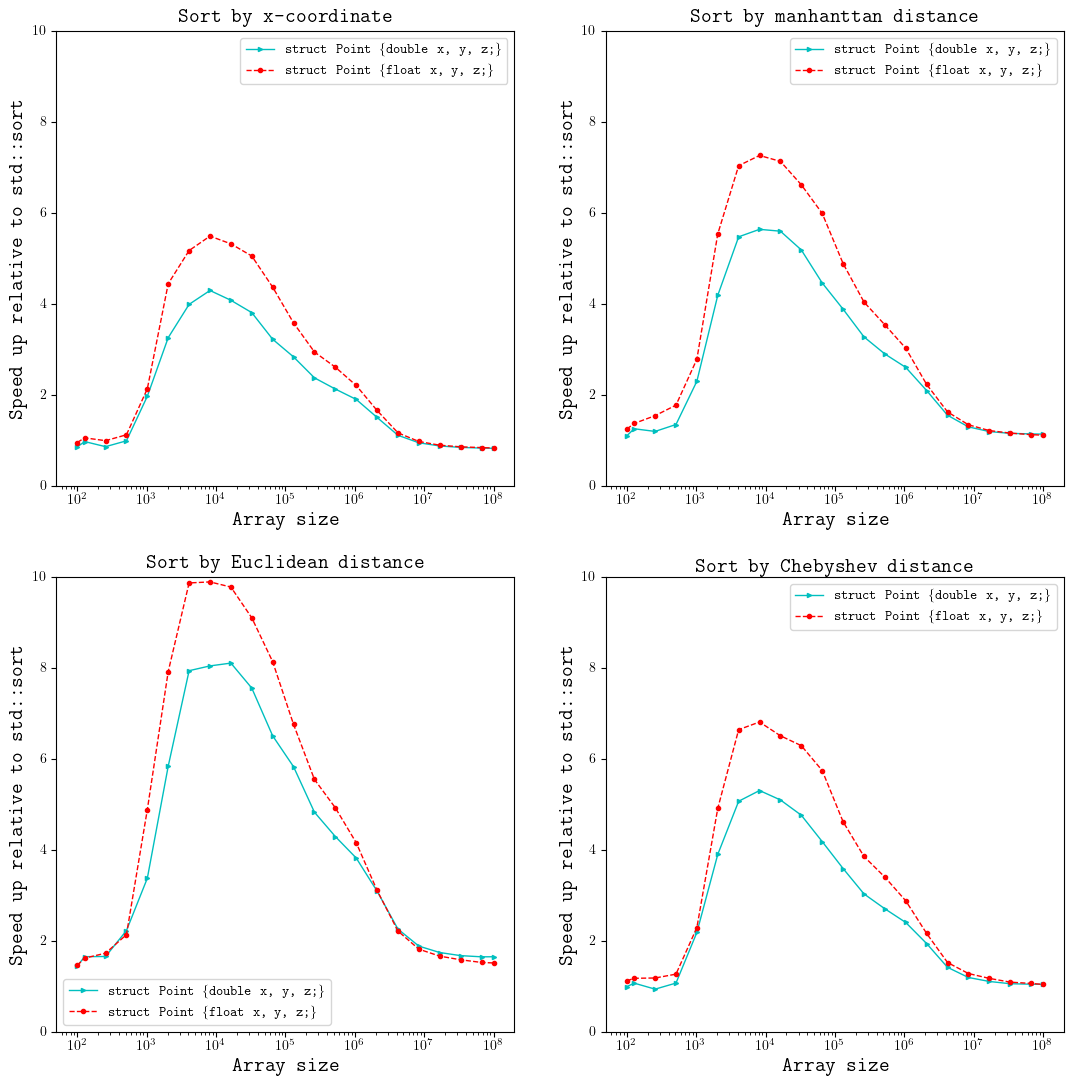

In [36]:
def getperf(df, metric):
    simdm = "simdobjsort<Point3D<" + metric + ">>"
    scalarm = "scalarobjsort<Point3D<" + metric + ">>"
    t1 = df[df['name'].str.contains(simdm)]["real_time"]
    t2 = df[df['name'].str.contains(scalarm)]["real_time"]
    return np.array(t2)/np.array(t1)

xf = df[df['name'].str.contains("scalarobjsort<Point3D<float-x>>")]["arraysize"]
xd = df[df['name'].str.contains("scalarobjsort<Point3D<double-x>>")]["arraysize"]

fig = plt.figure()
plt.rcParams['figure.figsize'] = [13,13]
plt.subplot(2, 2, 1)
plt.plot(xd, getperf(df, "double-x"), '->c', linewidth='1', markersize='3', label='struct Point \{double x, y, z;\}')
plt.plot(xf, getperf(df, "float-x"), '--or', linewidth='1', markersize='3', label='struct Point \{float x, y, z;\}')
plt.xscale("log")
plt.ylim(0,10)
plt.xlabel("Array size", fontsize=15)
plt.ylabel("Speed up relative to std::sort", fontsize=15)
plt.title('Sort by x-coordinate', fontsize=15)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(xd, getperf(df, "double-taxicab"), '->c', linewidth='1', markersize='3', label='struct Point \{double x, y, z;\}')
plt.plot(xf, getperf(df, "float-taxicab"), '--or', linewidth='1', markersize='3', label='struct Point \{float x, y, z;\}')
plt.xscale("log")
plt.ylim(0,10)
plt.xlabel("Array size", fontsize=15)
plt.ylabel("Speed up relative to std::sort", fontsize=15)
plt.title('Sort by manhanttan distance', fontsize=15)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(xd, getperf(df, "double-euclidean"), '->c', linewidth='1', markersize='3', label='struct Point \{double x, y, z;\}')
plt.plot(xf, getperf(df, "float-euclidean"), '--or', linewidth='1', markersize='3', label='struct Point \{float x, y, z;\}')
plt.xscale("log")
plt.ylim(0,10)
plt.xlabel("Array size", fontsize=15)
plt.ylabel("Speed up relative to std::sort", fontsize=15)
plt.title('Sort by Euclidean distance', fontsize=15)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(xd, getperf(df, "double-chebyshev"), '->c', linewidth='1', markersize='3', label='struct Point \{double x, y, z;\}')
plt.plot(xf, getperf(df, "float-chebyshev"), '--or', linewidth='1', markersize='3', label='struct Point \{float x, y, z;\}')
plt.xscale("log")
plt.ylim(0,10)
plt.xlabel("Array size", fontsize=15)
plt.ylabel("Speed up relative to std::sort", fontsize=15)
plt.title('Sort by Chebyshev distance', fontsize=15,pad=-14)
plt.legend()
fig.savefig('object_qsort-perf.jpg')

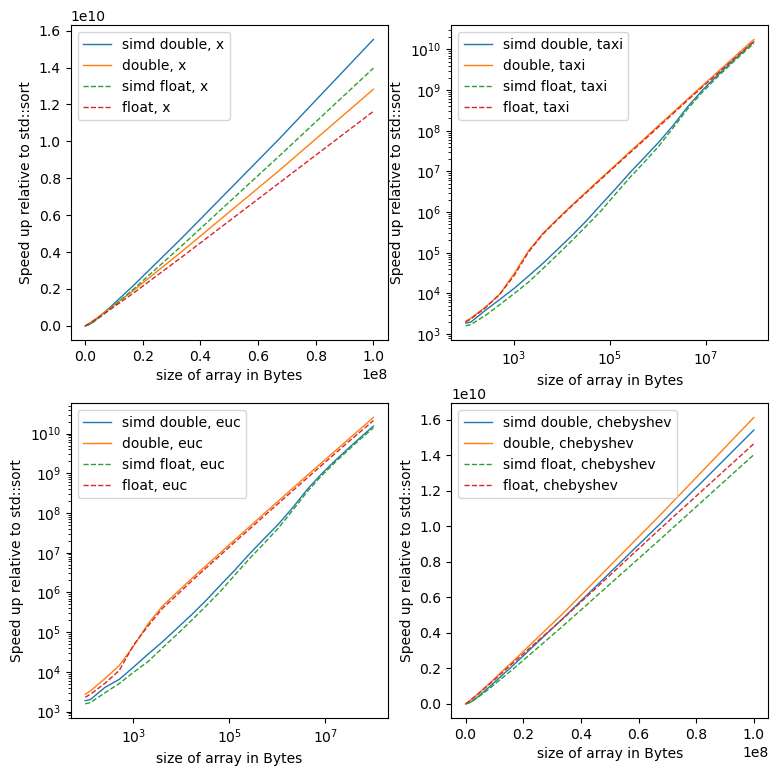

In [31]:
def getsimdcol(df, metric):
    simdm = "simdobjsort<Point3D<" + metric + ">>"
    t1 = df[df['name'].str.contains(simdm)]["real_time"]
    return np.array(t1)

def getscalarcol(df, metric):
    simdm = "scalarobjsort<Point3D<" + metric + ">>"
    t1 = df[df['name'].str.contains(simdm)]["real_time"]
    return np.array(t1)

xf = df[df['name'].str.contains("scalarobjsort<Point3D<float-x>>")]["arraysize"]
xd = df[df['name'].str.contains("scalarobjsort<Point3D<double-x>>")]["arraysize"]

fig = plt.figure()
plt.rcParams['figure.figsize'] = [9,9]
plt.subplot(2, 2, 1)
plt.plot(xd, getsimdcol(df, "double-x"), '-', linewidth='1', label='simd double, x')
plt.plot(xd, getscalarcol(df, "double-x"), '-', linewidth='1', label='double, x')
plt.plot(xd, getsimdcol(df, "float-x"), '--', linewidth='1', label='simd float, x')
plt.plot(xd, getscalarcol(df, "float-x"), '--', linewidth='1', label='float, x')

plt.xlabel("size of array in Bytes")
plt.ylabel("Speed up relative to std::sort")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(xd, getsimdcol(df, "double-taxicab"), '-', linewidth='1', label='simd double, taxi')
plt.plot(xd, getscalarcol(df, "double-taxicab"), '-', linewidth='1', label='double, taxi')
plt.plot(xd, getsimdcol(df, "float-taxicab"), '--', linewidth='1', label='simd float, taxi')
plt.plot(xd, getscalarcol(df, "float-taxicab"), '--', linewidth='1', label='float, taxi')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("size of array in Bytes")
plt.ylabel("Speed up relative to std::sort")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(xd, getsimdcol(df, "double-euclidean"), '-', linewidth='1', label='simd double, euc')
plt.plot(xd, getscalarcol(df, "double-euclidean"), '-', linewidth='1', label='double, euc')
plt.plot(xd, getsimdcol(df, "float-euclidean"), '--', linewidth='1', label='simd float, euc')
plt.plot(xd, getscalarcol(df, "float-euclidean"), '--', linewidth='1', label='float, euc')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("size of array in Bytes")
plt.ylabel("Speed up relative to std::sort")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(xd, getsimdcol(df, "double-chebyshev"), '-', linewidth='1', label='simd double, chebyshev')
plt.plot(xd, getscalarcol(df, "double-chebyshev"), '-', linewidth='1', label='double, chebyshev')
plt.plot(xd, getsimdcol(df, "float-chebyshev"), '--', linewidth='1', label='simd float, chebyshev')
plt.plot(xd, getscalarcol(df, "float-chebyshev"), '--', linewidth='1', label='float, chebyshev')
plt.xlabel("size of array in Bytes")
plt.ylabel("Speed up relative to std::sort")
plt.legend()